In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [32]:
alpha = 1.0

n = 10
p = 10
n_groups = int(p/1)
seed = 0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(
    n, p, n_groups, rho=0, svd_transform=True
).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    thr=1e-12,
    max_cds=int(1e5),
    newton_max_iters=10000,
)

In [33]:
pack

CommonPack(groups=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), group_sizes=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), alpha=1.0, penalty=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), strong_set=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), strong_g1=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), strong_g2=array([], dtype=int32), strong_begins=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), strong_A_diag=array([1.40796205, 0.74631812, 0.84644606, 2.25289026, 1.17534064,
       0.83054466, 1.10300359, 0.60126752, 0.76980036, 0.46046292]), lmda_max=3.1202147870536017, lmdas=array([3.12021479, 2.97839621, 2.84302351, 2.7138037 , 2.59045713,
       2.47271686, 2.36032806, 2.25304751, 2.15064302, 2.05289298,
       1.95958582, 1.87051962, 1.78550162, 1.70434781, 1.62688258,
       1.55293825, 1.48235481, 1.4149795 , 1.3506665 , 1.28927662,
       1.23067701, 1.17474084, 1.12134705, 1.0703801 , 1.02172967,
       0.97529048, 0.93096202, 0.88864836, 0.84825792

In [34]:
pack1 = deepcopy(pack)
pack2 = deepcopy(pack)
pack3 = deepcopy(pack)

In [35]:
%%time
gl_out = group_lasso(X, pack1, fit_type='data')

CPU times: user 917 µs, sys: 0 ns, total: 917 µs
Wall time: 916 µs


In [36]:
%%time
gl_out2 = group_lasso(X, pack2, fit_type='data_newton')

CPU times: user 404 µs, sys: 468 µs, total: 872 µs
Wall time: 870 µs


In [37]:
A = np.asfortranarray(X.T @ X)

In [38]:
%%time
gl_out3 = group_lasso(A, pack3, fit_type='full_cov')

CPU times: user 855 µs, sys: 0 ns, total: 855 µs
Wall time: 855 µs


In [39]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2,  gl_out2['rsqs'] / np.linalg.norm(y) ** 2

(array([0.        , 0.04872427, 0.09312   , 0.13956085, 0.18458233,
        0.22560422, 0.26298184, 0.30187554, 0.35285721, 0.39930982,
        0.44163571, 0.48020148, 0.51534117, 0.54735915, 0.57653274,
        0.60311463, 0.62733506, 0.64940381, 0.66951204, 0.6878339 ,
        0.7045281 , 0.71973924, 0.73359906, 0.74622761, 0.75773427,
        0.76821872, 0.77777175, 0.78647612, 0.79440722, 0.80163374,
        0.80821828, 0.81421786, 0.81968446, 0.82466542, 0.82920389,
        0.83333917, 0.83710708, 0.84054027, 0.84366846, 0.84651874,
        0.85014933, 0.8546867 , 0.85882098, 0.86258799, 0.86602034,
        0.86914778, 0.87199738, 0.87573723, 0.8803553 , 0.88456311,
        0.88839711, 0.89189051, 0.89507356, 0.89797384, 0.90061647,
        0.90302431, 0.90521827, 0.90721732, 0.90903879, 0.91069843,
        0.91221064, 0.91358851, 0.91495685, 0.91952045, 0.92592512,
        0.93176079, 0.93707807, 0.94192298, 0.94633745, 0.95035978,
        0.9543312 , 0.95805579, 0.96144972, 0.96

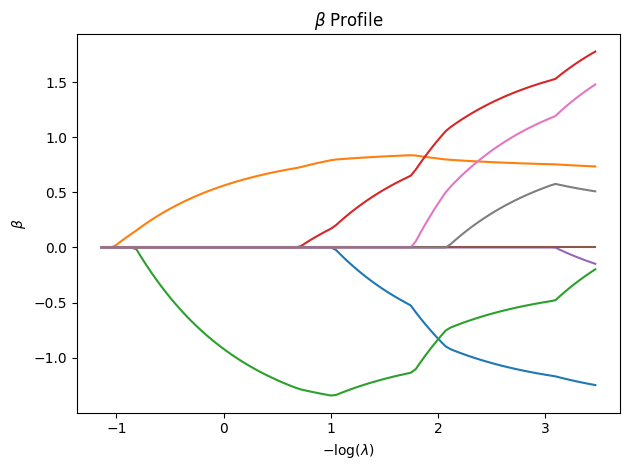

In [40]:
min_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]
max_idx = np.unravel_index(np.argmax(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == min_idx or j == max_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [19]:
np.max(gl_out['betas']-gl_out3['betas']), np.max(gl_out2['betas'] - gl_out3['betas'])

(3.885780586188048e-16, 9.59290258339962e-10)